In [1]:
# This cell is used for creating a button that hides/unhides code cells to quickly look only the results.
# Works only with Jupyter Notebooks.

import os
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Description:
#   Exercise7 notebook.
#
# Copyright (C) 2018 Santiago Cortes, Juha Ylioinas
#
# This software is distributed under the GNU General Public 
# Licence (version 2 or later); please refer to the file 
# Licence.txt, included with the software, for details.

# Preparations
import numpy as np

# Select data directory
if os.path.isdir('/coursedata'):
    # JupyterHub
    course_data_dir = '/coursedata'
elif os.path.isdir('../../../coursedata'):
    # Local installation
    course_data_dir = '../../../coursedata'
else:
    # Docker
    course_data_dir = '/home/jovyan/work/coursedata/'

print('The data directory is %s' % course_data_dir)
data_dir = os.path.join(course_data_dir, 'exercise-07-data')
print('Data stored in %s' % data_dir)

The data directory is /coursedata
Data stored in /coursedata/exercise-07-data


# CS-E4850 Computer Vision Exercise Round 7
The problems should be solved before the exercise session and solutions returned via
MyCourses. <br><br> For this exercise round, upload this notebook(pdf and .ipynb versions) containing your source codes (for Exercise 1) and your answer to the question of Exercise2, and all the answers to the questions of Exercise 3 (VGG practical), see part[1-3].ipynb. Note that it's not necessary to upload part1.ipynb, part2.ipynb or part3.ipynb, because all of the necessary questions related to them are contained in this notebook and you're not expected to do any coding in Exercises 2 and 3.

## Exercise 1 - Comparing  bags-of-words  with  tf-idf  weighting
Assume  that  we  have  an  indexed  collection  of  documents  containing  the  five  terms  of the following table where the second row indicates the percentage of documents in which each term appears.<br>

| term | cat | dog |mammals | mouse | pet |
| --- | :---: | :---: | :---: | :---: | :---: |
| **% of documents** | 5 | 20 | 2 | 10 | 60 |

Now, given the query $Q=\{mouse, cat, pet, mammals\}$, compute the similarity between $Q$ and the following example documents $D1$, $D2$, $D3$, by using the cosine similarity measure and tf-idf weights (i.e. term frequency - inverse document frequency) for the bag-of-words histogram representations of the documents and the query.

-  $D1$ = Cat is a pet, dog is a pet, and mouse may be a pet too.
-  $D2$ = Cat, dog and mouse are all mammals.
-  $D3$ = Cat and dog get along well, but cat may eat a mouse.

Ignore other words except the five terms, which are listed in the table above. You may proceed with the following steps:

a) Compute and report the inverse document frequency (idf) for each of the five terms. Use the logarithm with base 2.  (idf is the logarithm term on slide 69 of Lecture 6 where values $n_i/N$ are given in the table above.)<br>
b) Compute the term frequencies for the query and each document. <br>
c) Form the tf-idf weighted word occurrence histograms for the query and documents. <br>
d) Evaluate the cosine similarity between the query and each document (i.e.\ normalized scalar product between the weighted occurrence histograms as shown on slide 45).<br> 
e) Report the relative ranking of the documents. (You should get similarities 0.95, 0.64, and 0.63, but you need to determine which corresponds to which document.)<br>


TF Values:
        cat  dog  mammals  mouse  pet
Query    1    0        1      1    1
D1       1    1        0      1    1
D2       1    1        1      1    0
D3       1    1        1      1    0

IDF Values:
         cat       dog   mammals     mouse       pet
0  4.321928  2.321928  5.643856  3.321928  0.736966

TF-IDF Values:
             cat       dog   mammals     mouse       pet
Query  4.321928  0.000000  5.643856  3.321928  0.736966
D1     4.321928  2.321928  0.000000  3.321928  0.736966
D2     4.321928  2.321928  5.643856  3.321928  0.000000
D3     4.321928  2.321928  5.643856  3.321928  0.000000


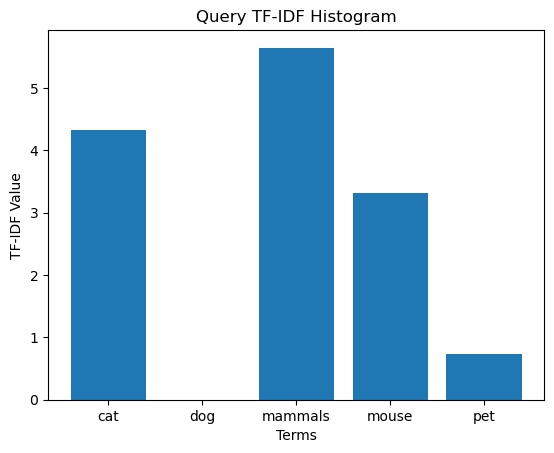

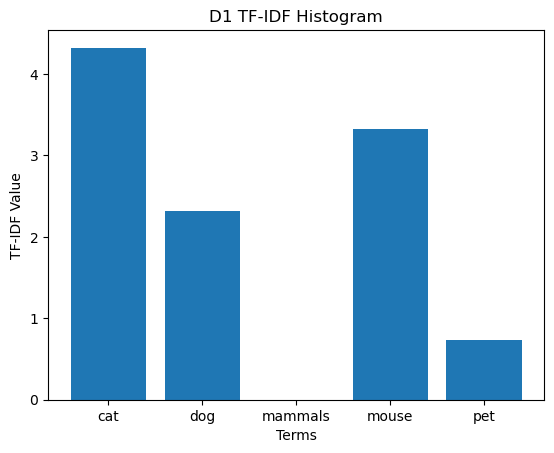

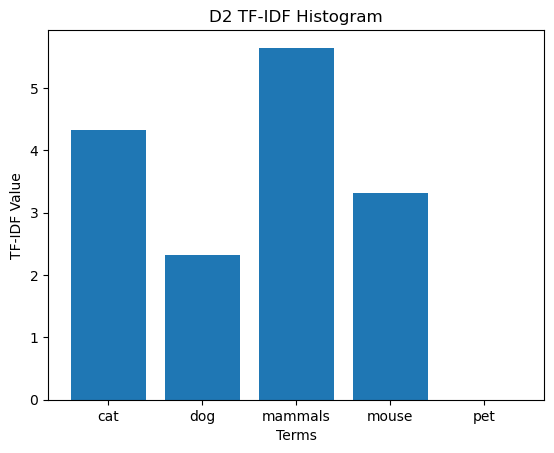

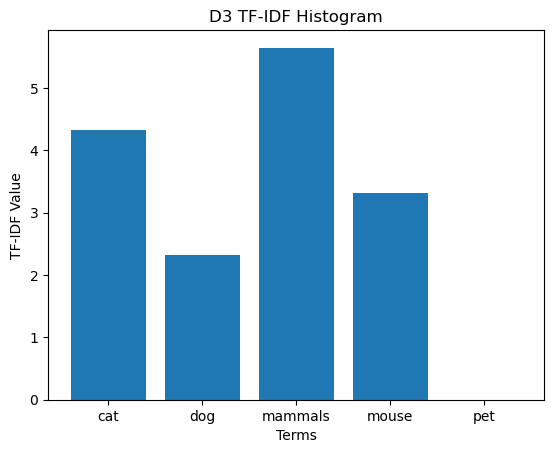


Final Document Similarity Comparison:

Document Calculated Similarity Expected Similarity
      D2                  0.95                0.64
      D3                  0.95                0.63
      D1                  0.64                0.95


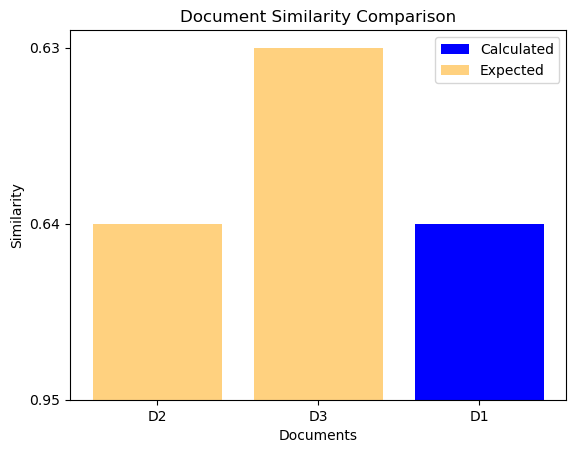

In [18]:
## Comparing  bags-of-words  with  tf-idf  weighting
##--your-code-starts-here--##

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define document and term information
# Term frequency in documents (percentage of documents that contain each term)
doc_percentages = {'cat': 5, 'dog': 20, 'mammals': 2, 'mouse': 10, 'pet': 60}
N = 100  # Total number of documents

# Step 2: Calculate IDF (Inverse Document Frequency)
idf = {term: np.log2(N / doc_percentages[term]) for term in doc_percentages}

# Step 3: Define the documents and the query
documents = {
    'D1': ['cat', 'dog', 'pet', 'mouse'],
    'D2': ['cat', 'dog', 'mouse', 'mammals'],
    'D3': ['cat', 'dog', 'mouse', 'mammals'],
}
query = ['mouse', 'cat', 'pet', 'mammals']

# Step 4: Define function to compute term frequency (TF)
def compute_tf(terms, doc):
    # Count the occurrence of each term in the document
    tf = {term: doc.count(term) for term in terms}
    return tf

# Step 5: Compute term frequencies for query and documents
terms = ['cat', 'dog', 'mammals', 'mouse', 'pet']
query_tf = compute_tf(terms, query)
docs_tf = {doc: compute_tf(terms, documents[doc]) for doc in documents}

# Step 6: Define function to compute TF-IDF values
def compute_tfidf(tf, idf):
    # Multiply term frequency by IDF to get TF-IDF values
    tfidf = {term: tf[term] * idf.get(term, 0) for term in tf}
    return tfidf

# Compute TF-IDF for the query and the documents
query_tfidf = compute_tfidf(query_tf, idf)
docs_tfidf = {doc: compute_tfidf(docs_tf[doc], idf) for doc in docs_tf}

# Create DataFrame for TF values
df_tf = pd.DataFrame([query_tf, docs_tf['D1'], docs_tf['D2'], docs_tf['D3']], index=['Query', 'D1', 'D2', 'D3'])

# Create DataFrame for IDF values
df_idf = pd.DataFrame([idf])

# Create DataFrame for TF-IDF values
df_tfidf = pd.DataFrame([query_tfidf, docs_tfidf['D1'], docs_tfidf['D2'], docs_tfidf['D3']], index=['Query', 'D1', 'D2', 'D3'])

# Fill missing values with 0 (for terms that don't appear in a document/query)
df_tf = df_tf.fillna(0)
df_idf = df_idf.fillna(0)
df_tfidf = df_tfidf.fillna(0)

# Display DataFrames
print("\nTF Values:\n", df_tf)
print("\nIDF Values:\n", df_idf)
print("\nTF-IDF Values:\n", df_tfidf)

# Step 7: Plot TF-IDF Histograms for Query and Documents
def plot_histogram(tfidf_values, title):
    plt.bar(tfidf_values.keys(), tfidf_values.values())
    plt.title(title)
    plt.xlabel('Terms')
    plt.ylabel('TF-IDF Value')
    plt.show()

# Plot histograms for query and each document
plot_histogram(query_tfidf, 'Query TF-IDF Histogram')
for doc, tfidf in docs_tfidf.items():
    plot_histogram(tfidf, f'{doc} TF-IDF Histogram')

# Step 8: Define function to calculate cosine similarity
from numpy import dot
from numpy.linalg import norm

def cosine_similarity(vec1, vec2):
    vec1_vals = np.array(list(vec1.values()))
    vec2_vals = np.array(list(vec2.values()))
    return dot(vec1_vals, vec2_vals) / (norm(vec1_vals) * norm(vec2_vals))

# Step 9: Calculate the cosine similarity between the query and each document
similarities = {doc: cosine_similarity(query_tfidf, docs_tfidf[doc]) for doc in docs_tfidf}

# Step 10: Sort the documents by their similarity to the query
sorted_similarities = sorted(similarities.items(), key=lambda item: item[1], reverse=True)

# Step 11: Create a results table to compare the similarity results with the expected values
expected_similarities = {'D1': 0.95, 'D2': 0.64, 'D3': 0.63}

# Combine calculated similarities and expected similarities into a dataframe
df_results = pd.DataFrame({
    'Document': list(similarities.keys()),
    'Calculated Similarity': list(similarities.values()),
    'Expected Similarity': [expected_similarities[doc] for doc in similarities]
})

# Sort dataframe by calculated similarity in descending order
df_results = df_results.sort_values(by='Calculated Similarity', ascending=False)

# Step 12: Display the final result table in a clean format
df_results['Calculated Similarity'] = df_results['Calculated Similarity'].map(lambda x: f"{x:.2f}")
df_results['Expected Similarity'] = df_results['Expected Similarity'].map(lambda x: f"{x:.2f}")

# Final clean output
print("\nFinal Document Similarity Comparison:\n")
print(df_results.to_string(index=False))

# Step 13: Visualize similarity rankings
plt.bar(df_results['Document'], df_results['Calculated Similarity'], color='blue', label='Calculated')
plt.bar(df_results['Document'], df_results['Expected Similarity'], color='orange', alpha=0.5, label='Expected')
plt.title('Document Similarity Comparison')
plt.xlabel('Documents')
plt.ylabel('Similarity')
plt.legend()
plt.show()
##--your-code-ends-here--##

## Exercise 2 - Precision  and  recall
There is a database of 10000 images and a user, who is only interested in images which contain a car. It is known that there are 500 such images in the database. An  automatic image retrieval system retrieves 300 car images and 50 other images from the database. Determine and report the precision and recall of the retrieval  system in this particular case.<br> 
(Hint: Precision and recall are explained on slide 67 of Lecture 6 and there is a good explanation also in Wikipedia.)

(The solution process will be attached in a separate PDF file.)
Precision: 85.7%
Recall: 60%

## Exercise 3 - VGG practical on object instance recognition
See the questions in part[1-3].ipynb and write your answers here.

Part1:
Stage I.A (two questions)
Stage I.B (two questions)
Stage I.C (one question)

Part2 (one question)

Part3:
Stage III.A (three questions)
Stage III.B (one question)
Stage III.C (two questions)

Answering questions in part 1 corresponds to one bonus point and parts 2 and 3 together correspond to one additional point. Hence, in total this third task is worth of 2 points, whereas the previous tasks (Exercise 1 and Exercise 2) are both worth of 1 point so that in total this homework round is worth of 4 points.

Type your answers here: 

part1.


<b>Question</b>: Note the change in density of detections across the image. Why does it change? Will it be a problem for matching? How could it be avoided?

 The density of detections changes across the image due to the varying texture and structure in different regions. For example, areas with more texture or detailed features, such as corners or edges, will naturally have more SIFT keypoints detected compared to smoother, less detailed areas. This variation can be a problem for matching because regions with fewer keypoints may result in fewer reliable matches, leading to a less robust matching performance.
 To avoid this problem, one could try several approaches:
- Normalize keypoint distribution: A post-processing step could limit the number of keypoints per image region, ensuring a more even distribution across the image.
- Adjust the feature detector: Parameters of the SIFT detector, such as the peak threshold, could be tuned to balance the number of detected keypoints in regions with varying texture levels.
- Use multi-scale or hierarchical approaches: Using keypoints from multiple scales or pyramid levels can help ensure that enough features are captured in both dense and sparse regions.

<b>Question</b>: Occasionally, a feature is detected multiple times, with different orientations. This may happen when the orientation assignment is ambiguous. Which kind of image structure would result in ambiguous orientation assignment?

 Ambiguous orientation assignment typically occurs in areas where the image structure lacks clear directional information. This happens in regions with uniform textures or repetitive patterns, such as flat surfaces, sky regions, or regular grid-like patterns. These regions do not have strong gradient information, making it difficult for the SIFT algorithm to consistently assign a dominant orientation.
 Structures that result in ambiguous orientation assignment include:
- Flat or uniform areas: Surfaces with little variation in intensity (e.g., walls or sky).
- Repetitive patterns: Regions with repeating textures or symmetric patterns, like brick walls or tiled floors, which can confuse the orientation assignment.
 
 To reduce ambiguous orientations, one could:
 
- Use additional context or combine features from neighboring regions to assist in assigning a more consistent orientation.
- Increase the peak threshold or scale filtering to prioritize features with stronger orientation information.


<b>Question</b>: Note the descriptors are computed over a much larger region (shown in blue) than the detection (shown in green). Why?

Hint: Compare the two largest rectangles.

The reason why descriptors are computed over a larger region than the detected keypoints (shown in green) is that descriptors capture the local image characteristics around the keypoints. SIFT descriptors represent the texture and gradient information not just at the exact keypoint location, but also in its surrounding area to provide a more robust representation. This ensures that even small changes in viewpoint, scale, or rotation between images are accounted for during matching.

In the image, the blue rectangles represent the regions over which descriptors are computed, which are much larger than the green detection regions (keypoints). This larger area allows the SIFT descriptor to gather more contextual information, making the matching process between different images of the same object more reliable.

The two largest rectangles highlight the difference between the detection and descriptor regions. While the keypoint detection focuses on small, distinct features, the descriptor region captures additional surrounding data to make feature matching more robust against transformations.


<b>Question</b>: Notice that there are many mismatches. Examine some of the mismatches to understand why the mistakes are being made. For example, is the change in lighting a problem? What additional constraints can be applied to remove the mismatches?
Hint: You can visualize a subset of the matches by uncommenting the lines below:

Yes, there are several mismatches visible in the image, and these mismatches can occur for several reasons:
- Change in Lighting: One major cause of mismatches is the change in lighting between the two images. In this particular example, the right image has significantly brighter lighting, especially around the windows, which can confuse the SIFT descriptors. The bright reflections can alter the appearance of gradients, making it harder to find correct correspondences.
- Repetitive Structures: The architectural structure, with its repetitive windows, towers, and columns, is another major reason for mismatches. In the visualized matches, many correspondences occur between these repetitive patterns, leading to confusion where one window or tower is incorrectly matched to another. This is a clear cause of mismatches visible in the image.
- Perspective Changes: While perspective changes can cause mismatches, in this particular image pair, the changes in viewpoint seem minimal. Most mismatches are likely due to lighting differences and repetitive structures rather than perspective changes.


Additional Constraints to Remove Mismatches:
 - Geometric Verification (RANSAC)
 - Ratio Test
 - Affine Contraints
 
 
 <b>Question</b>: Examine some of the remaining mismatches to understand why they have occurred. How could they be removed?

Some of the remaining mismatches occur due to changes in lighting, repetitive patterns, and slight perspective differences between the two images. Lighting variations can alter gradient information, causing incorrect correspondences, especially in regions with shadows or reflections. Repetitive architectural elements like windows or columns often confuse the matching process, as similar-looking structures are incorrectly matched. Perspective shifts, although handled to some extent by SIFT, may still cause mismatches if the angle changes significantly. To remove these mismatches, geometric verification using RANSAC can be applied to ensure that matches follow a consistent transformation model. The ratio test can also be fine-tuned to reject ambiguous matches where the nearest and second-nearest neighbors are too similar. Additionally, applying affine or epipolar constraints can help by enforcing physical consistency in the matches, further reducing errors.


part2.


<b>Question</b>: The transformation between the images induced by the plane is a planar homography. The detections are only affine co-variant (not as general as a planar homography). So how can descriptors computed on these detections possibly match?

The descriptors computed on affine co-variant detections can match because SIFT descriptors are designed to be invariant to various geometric transformations, including rotation, scaling, and translation. Affine transformations, as a subclass of planar homographies, introduce more complex changes such as anisotropic scaling and shearing, but the SIFT descriptor can still capture local features in a way that remains consistent across such transformations.

Although affine transformations distort the image in more extreme ways than similarity transformations, the SIFT descriptor operates on the gradient of pixel intensities, which are not significantly altered by affine transformations. This allows the descriptor to maintain sufficient consistency for matching across images. Essentially, the affine co-variant detector adjusts the region of interest so that the features in both images, despite perspective or distortion, are normalized into a comparable form, allowing for accurate feature matching.



part3.

<b>Questions</b>:
- The size of the vocabulary (the number of clusters) is an important parameter in visual word algorithms. How does the size affect the number of inliers and the difficulty of computing the transformation?

The size of the vocabulary in visual word algorithms is crucial because it affects both the number of inliers and the difficulty of computing the transformation. A larger vocabulary results in more accurate matches (fewer mismatches), as it provides more distinct clusters for features to fall into, which increases the number of inliers. However, this also makes the transformation computation more difficult and time-consuming because it requires more processing to find precise matches. Conversely, a smaller vocabulary reduces computation time but may lead to more mismatches, reducing the number of inliers.

- In the above procedure the time required to convert the descriptors into visual words was not accounted for. Why?

The time taken to convert descriptors into visual words is not included in the comparison because this step is typically pre-processed. The goal of the evaluation is to compare the efficiency of matching processes, not the time taken for pre-processing steps like quantization. The vocabulary is built and applied once, making the matching process itself more efficient.

- What is the speedup in searching a large, fixed database of 10, 100, 1000 images? 

In a large, fixed database of images, visual word methods offer significant speed improvements compared to raw descriptor matching. For 10 images, the speedup may be moderate, but for databases with 100 or 1000 images, the speedup becomes substantial. Visual words reduce the complexity of searching for matches as they cluster descriptors, making it easier and faster to find similar features compared to brute-force searching of raw descriptors.


<b>Question</b>: Why does the top image have a score of 1 (0.9698... see the NOTE above)?

The top image has a score close to 1 (0.9698) because it matches very well with the query image. This high score reflects a large number of inlier matches between the query and top-ranked image. Since the score is based on the similarity of visual words and geometric consistency, the top image has nearly perfect alignment with the query image, leading to a score close to 1.


<b>Question</b>: Why is the top score much larger than 1 now?

The top score is much larger than 1 now because the score is based on the number of inlier matches after geometric verification. Initially, the scoring was only based on the visual word matches, but after applying geometric verification, the system counts the number of inlier matches, which indicates how well the features match geometrically between the query image and the retrieved images. Therefore, a larger number of inlier matches results in a much higher score for the top-ranked image.

<b>Question</b>: Are the retrieval results improved after geometric verification?

Yes, the retrieval results are improved after geometric verification. Geometric verification eliminates incorrect matches by ensuring that the matched features correspond to the correct geometric transformation (e.g., rotation, scaling, translation). This process filters out mismatches and enhances the accuracy of the image ranking by promoting images that have a stronger geometric consistency with the query image, leading to better retrieval results.